In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# **Exploring Dataset**

In [247]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


`ocean_proximity` cannot be fed directly into the model as it is not in the appropriate format

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Not all the numbers are the same 
- Some values are missing 
- Null values will be dropped since in this case it's not many of them

- Dropped null values and saved in the data file

In [249]:
data.dropna(inplace=True)

- Now they are all the same and there is no missing data

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


- Splitting data into features `X` and labels `y`

In [251]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

- Splitting data into training set and test set

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [253]:
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

In [254]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

column_names = {
	'<1H OCEAN': 'less_than_one_hour',
	'INLAND': 'ocean_proximity_inland',
	'ISLAND': 'ocean_proximity_island',
	'NEAR BAY': 'ocean_proximity_near_bay',
	'NEAR OCEAN': 'ocean_proximity_near_ocean'
}

train_data = train_data.rename(columns=column_names)
test_data = test_data.rename(columns=column_names)

In [255]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,less_than_one_hour,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
9299,-122.59,38.04,25.0,3412.0,455.0,1238.0,406.0,8.3646,397300.0,False,False,False,True,False
6302,-117.98,34.03,21.0,797.0,162.0,484.0,166.0,2.6250,191100.0,True,False,False,False,False
4435,-118.21,34.08,39.0,986.0,361.0,1347.0,299.0,2.2907,133900.0,True,False,False,False,False
12136,-117.13,33.89,4.0,1611.0,239.0,275.0,84.0,3.5781,244400.0,False,True,False,False,False
19084,-122.55,38.42,24.0,2220.0,411.0,894.0,365.0,4.2891,211700.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,-122.23,37.77,52.0,772.0,179.0,409.0,160.0,3.3214,189600.0,False,False,False,True,False
11995,-117.55,34.00,17.0,3583.0,700.0,1587.0,719.0,2.6979,75000.0,False,True,False,False,False
18092,-122.08,37.31,17.0,2560.0,396.0,959.0,400.0,7.8528,368900.0,True,False,False,False,False
2606,-124.10,41.04,26.0,1633.0,380.0,890.0,370.0,1.9741,97900.0,False,False,False,False,True


- The data below is skewed 
- This data does not follow a Normal Distribution
- The data will be processed such that it follows the required distribution

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

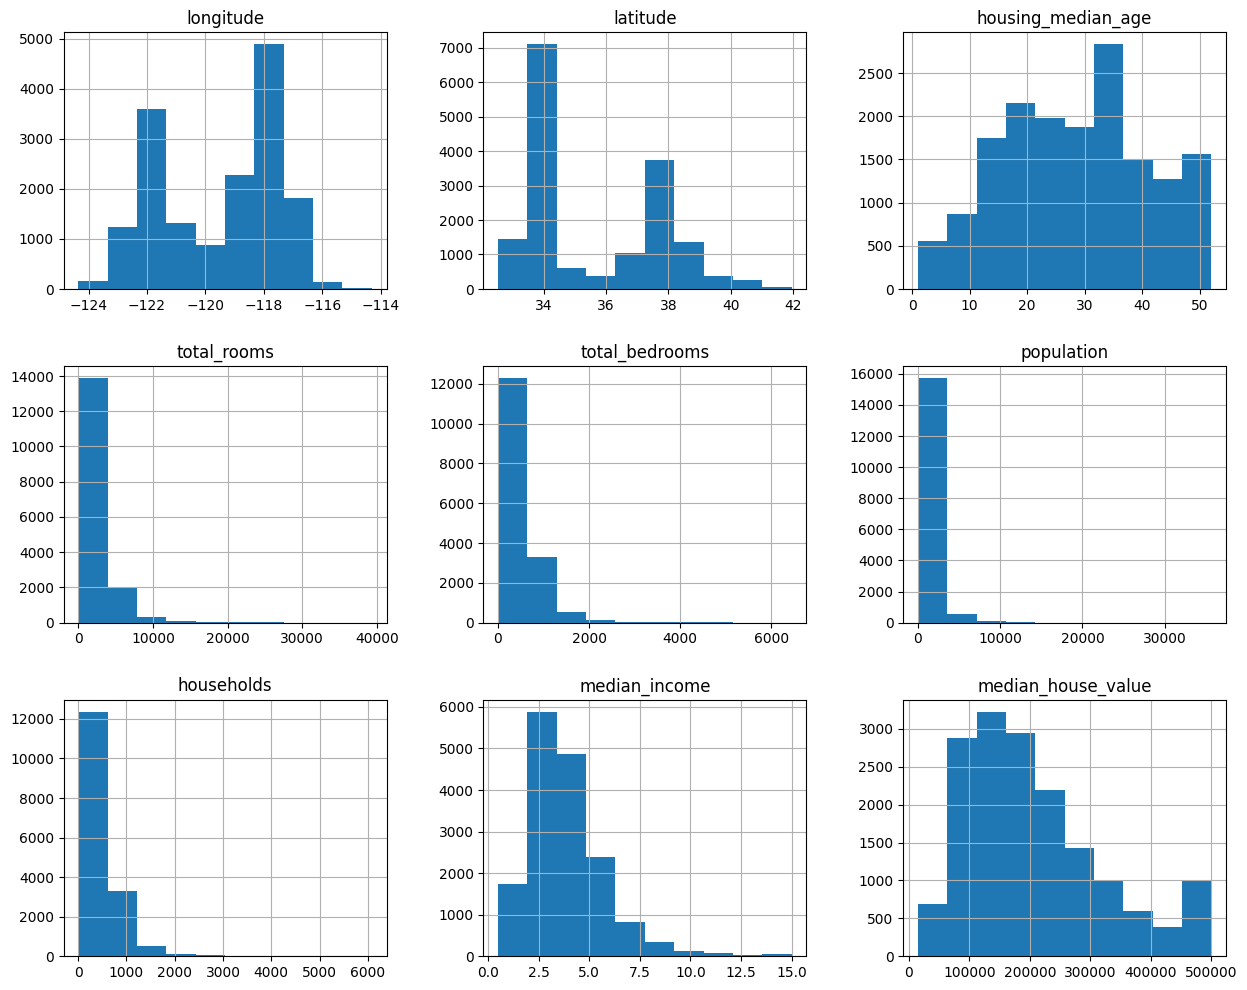

In [256]:
train_data.hist(figsize=(15, 12))

- Correlation matrix 

In [257]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,less_than_one_hour,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
longitude,1.000000,-0.924713,-0.115167,0.044079,0.067087,0.096064,0.053343,-0.014192,-0.041062,0.322449,-0.054553,0.008424,-0.477321,0.046714
latitude,-0.924713,1.000000,0.015342,-0.034964,-0.063752,-0.103963,-0.067948,-0.079895,-0.148511,-0.446486,0.350681,-0.014534,0.361375,-0.164000
housing_median_age,-0.115167,0.015342,1.000000,-0.356701,-0.317893,-0.290091,-0.300319,-0.112443,0.111553,0.044370,-0.241002,0.025154,0.260275,0.022807
total_rooms,0.044079,-0.034964,-0.356701,1.000000,0.931051,0.857423,0.920413,0.194650,0.130881,-0.002864,0.025106,-0.005026,-0.025955,-0.005948
total_bedrooms,0.067087,-0.063752,-0.317893,0.931051,1.000000,0.878362,0.980072,-0.012226,0.046578,0.018151,-0.005798,-0.002625,-0.021876,0.001848
population,0.096064,-0.103963,-0.290091,0.857423,0.878362,1.000000,0.908136,0.001727,-0.028730,0.073516,-0.018944,-0.008309,-0.062327,-0.023418
households,0.053343,-0.067948,-0.300319,0.920413,0.980072,0.908136,1.000000,0.008986,0.061343,0.041067,-0.037249,-0.007335,-0.013079,0.003480
median_income,-0.014192,-0.079895,-0.112443,0.194650,-0.012226,0.001727,0.008986,1.000000,0.684418,0.164229,-0.236319,-0.006349,0.058614,0.029791
median_house_value,-0.041062,-0.148511,0.111553,0.130881,0.046578,-0.028730,0.061343,0.684418,1.000000,0.254622,-0.484463,0.021128,0.160444,0.142729
less_than_one_hour,0.322449,-0.446486,0.044370,-0.002864,0.018151,0.073516,0.041067,0.164229,0.254622,1.000000,-0.603526,-0.012000,-0.314580,-0.344046


<Axes: >

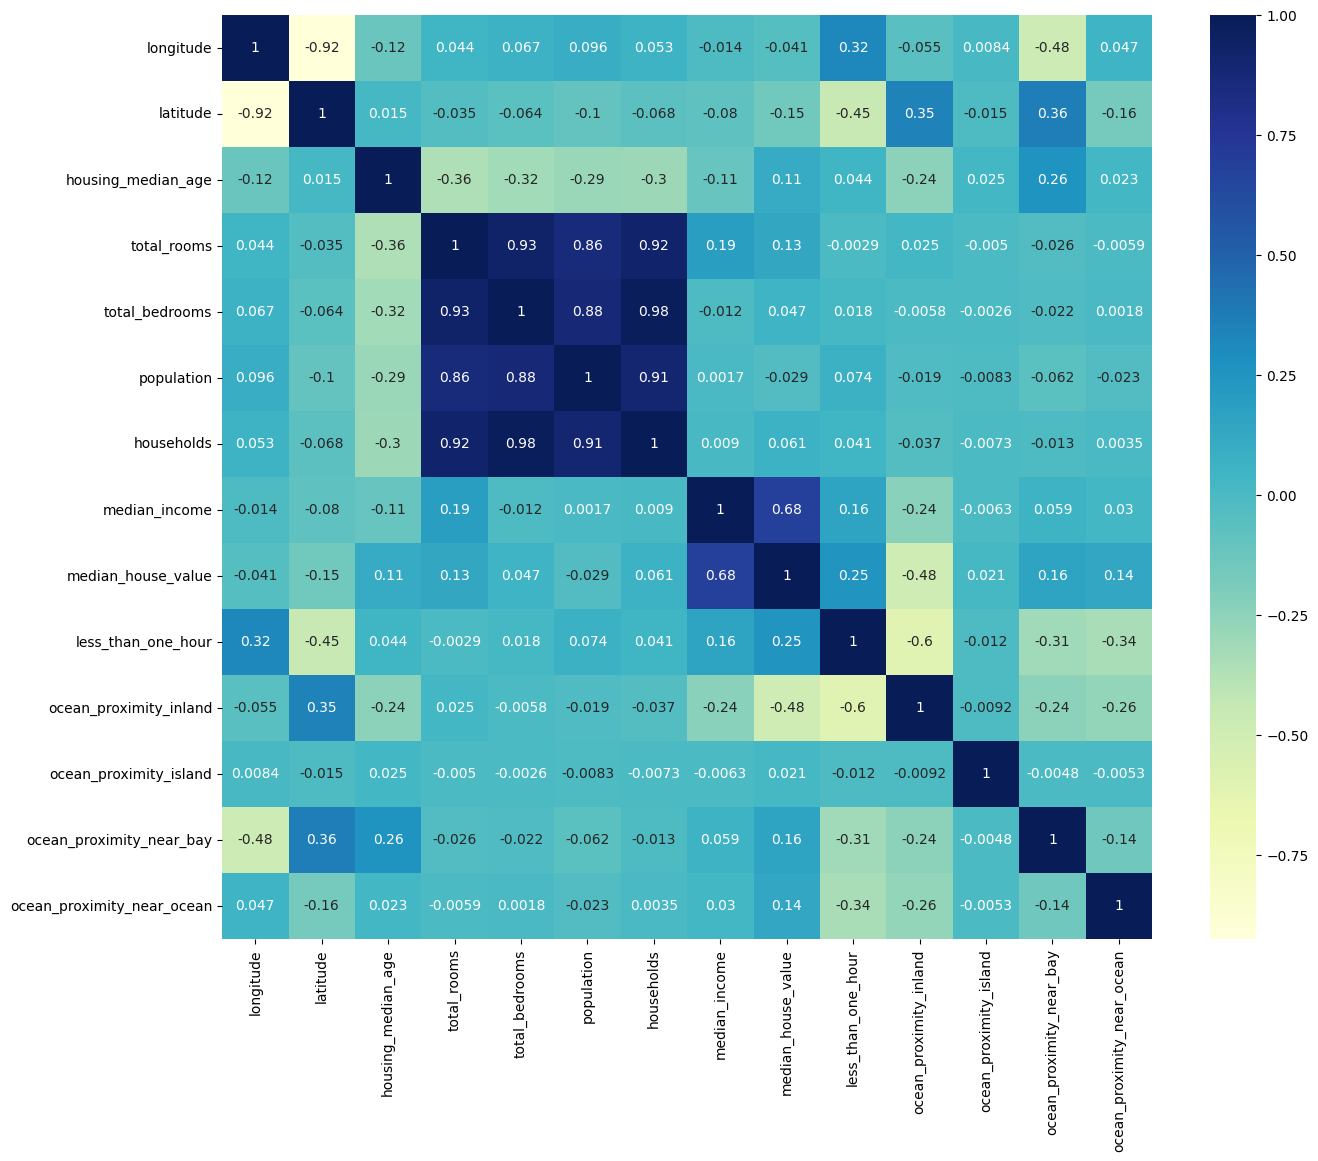

In [258]:
plt.figure(figsize=(15, 12))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

- Houses near the cost are more expensive

<Axes: xlabel='latitude', ylabel='longitude'>

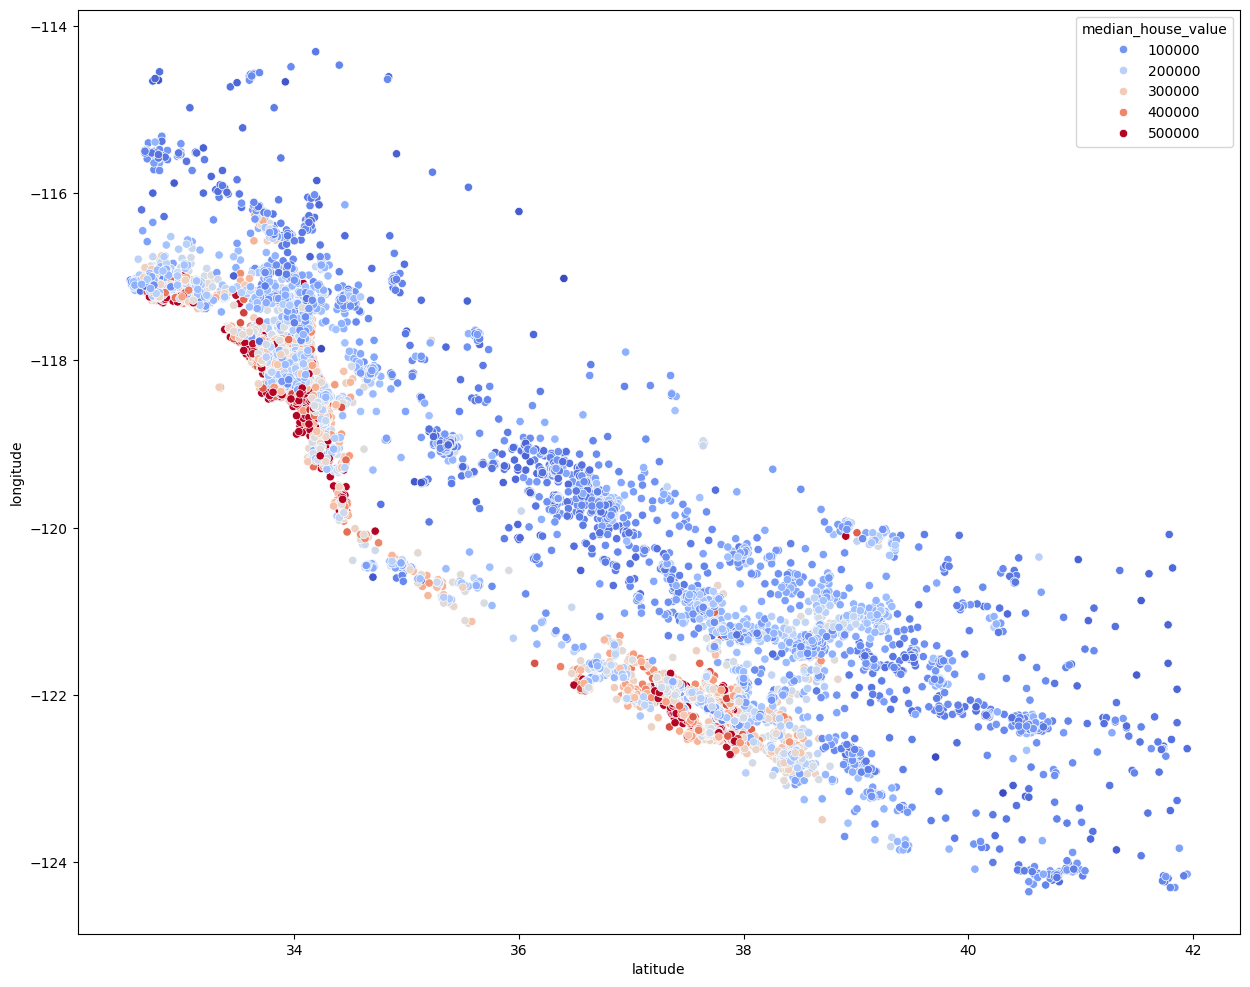

In [259]:
plt.figure(figsize=(15, 12))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

## **Combining Features**

- Working out the ratio of bedrooms in relation to the total number of bedrooms 

In [260]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']

- Working out the ratio of rooms in relation to each household

In [261]:
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

- Correlation heatmap with the new combined features

<Axes: >

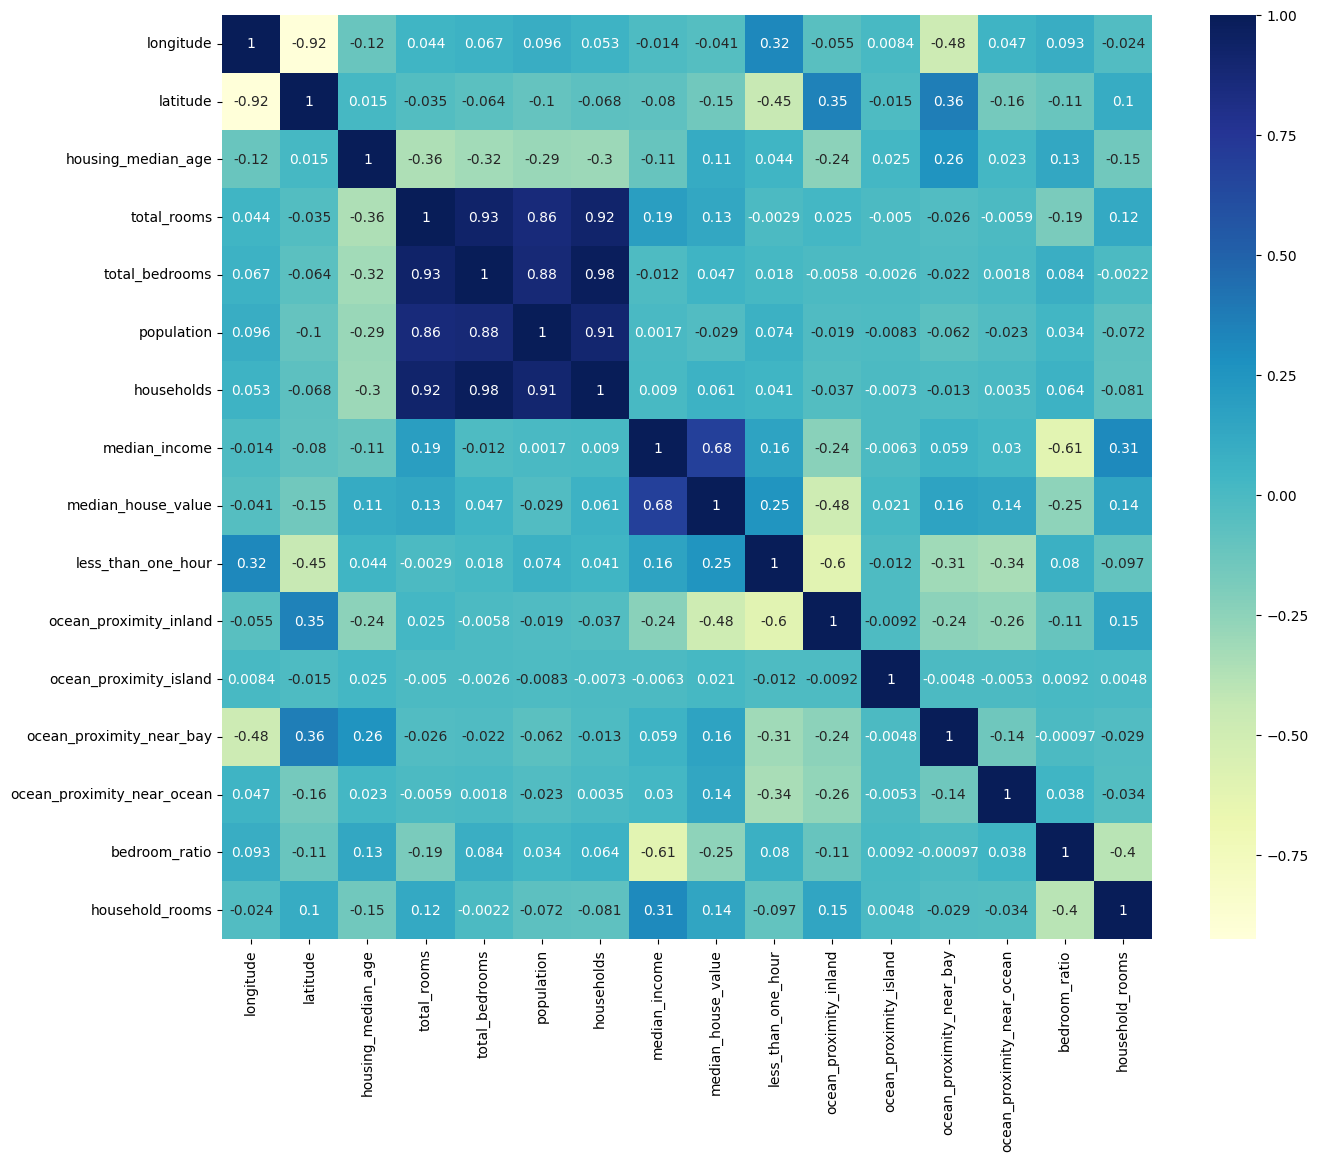

In [262]:
plt.figure(figsize=(15, 12))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

# **Pre-Processing Data**

- Applying logarithm to the data to see if it follows a Normal Distribution

In [263]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

- After applying the log formal, the graphs seem to be closer to a Normal Distribution
- The data follows a Log-Normal Distribution

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>, <Axes: >]],
      dtype=object)

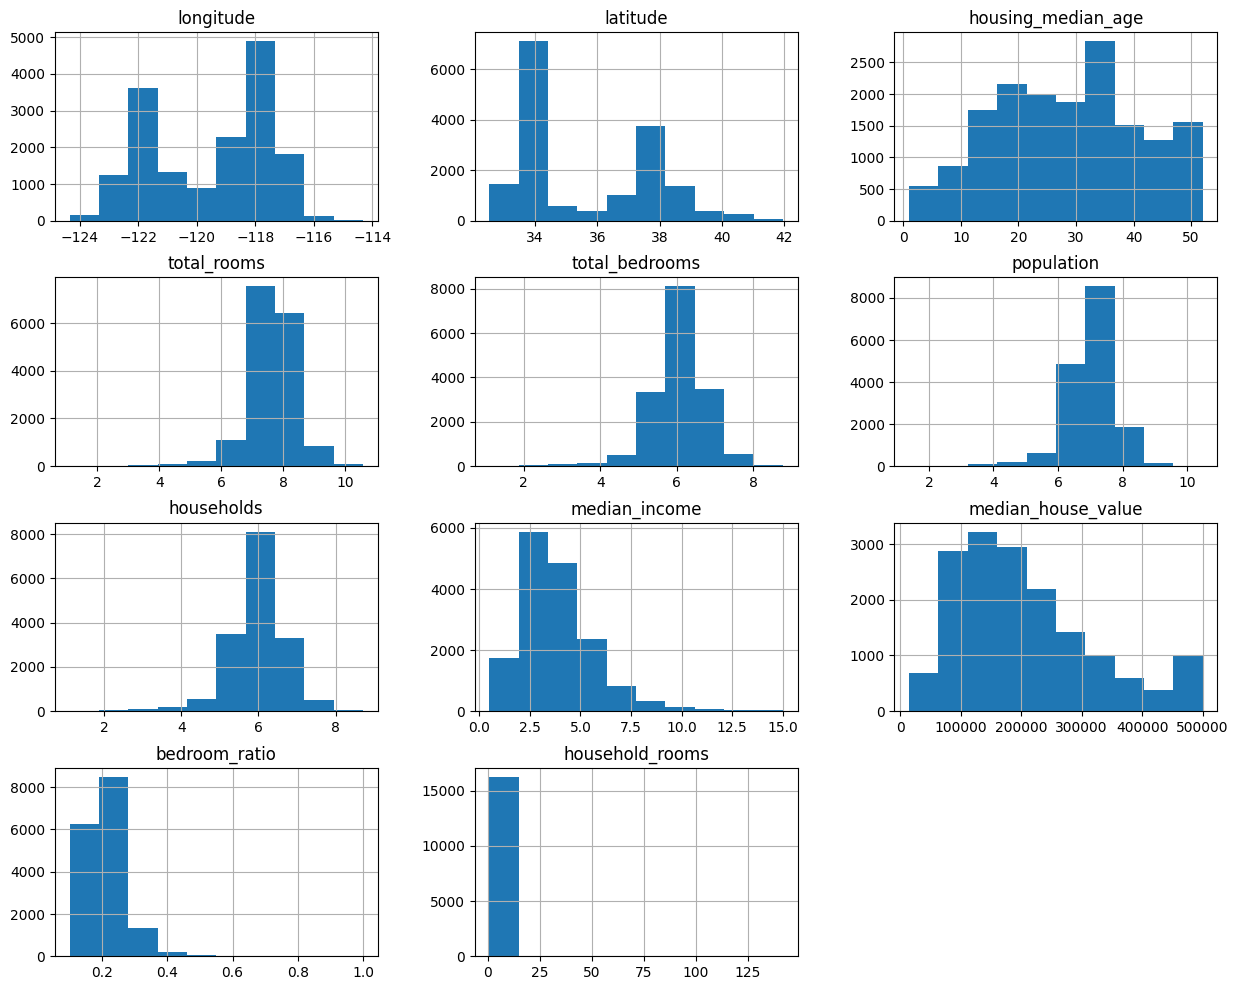

In [264]:
train_data.hist(figsize=(15,12))

In [265]:
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

# **Training Model**

## **Linear Regressor**

**Training Model Before Scaling Data**

In [266]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [267]:
reg.score(X_test, y_test)

0.6786344221330576

**Training Model after Scaling Data**

In [269]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [270]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [271]:
reg.score(X_train_scaled, y_train)

0.6700713500680417

## **Random Forest Regressor**

In [273]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [274]:
forest.score(X_test, y_test)

0.8247908089871804

### **Hyperparameter Tuning**

In [280]:
param_grid = {
	'n_estimators': [100, 200, 300],
	'min_samples_split': [2, 4],
	'max_depth': [None, 4, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [281]:
best_forest = grid_search.best_estimator_
best_forest


RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [282]:
best_forest.score(X_test, y_test)

0.8288685039425393